# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [40]:
import pandas as pd

---
## 2. Load data

In [42]:
df = pd.read_csv('C:/Users/User/Desktop/BCGX/Task3/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [43]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [46]:
price_df = pd.read_csv('C:/Users/User/Desktop/BCGX/Task3/price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [47]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

-Thank you for your assistance with data cleaning. Although we were informed that the data is clean, I will perform an additional review to ensure its accuracy and completeness. Once this verification is complete, I will proceed with feature selection to identify key features for predicting customer churn. But before then, let us merge the new features form the dataframe diff to our clean data set

erences!

In [50]:
# Assume df is your existing dataset and diff is the DataFrame with new features

# Merge the new features with the existing dataset on 'id'
df = pd.merge(df, diff, on='id', how='left')


In [51]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


In [52]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

In [53]:
#let's check missing values

print(df.isnull().sum())

id                                 0
channel_sales                      0
cons_12m                           0
cons_gas_12m                       0
cons_last_month                    0
date_activ                         0
date_end                           0
date_modif_prod                    0
date_renewal                       0
forecast_cons_12m                  0
forecast_cons_year                 0
forecast_discount_energy           0
forecast_meter_rent_12m            0
forecast_price_energy_off_peak     0
forecast_price_energy_peak         0
forecast_price_pow_off_peak        0
has_gas                            0
imp_cons                           0
margin_gross_pow_ele               0
margin_net_pow_ele                 0
nb_prod_act                        0
net_margin                         0
num_years_antig                    0
origin_up                          0
pow_max                            0
var_year_price_off_peak_var        0
var_year_price_peak_var            0
v

In [54]:
#excellent kindly forgive my review can I just check for duplicate

duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

# Print the duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.




"After thorough review, it is evident that the data is cl

---

                                 cons_12m  cons_gas_12m  cons_last_month  \
cons_12m                         1.000000      0.488474         0.968212   
cons_gas_12m                     0.488474      1.000000         0.507007   
cons_last_month                  0.968212      0.507007         1.000000   
forecast_cons_12m                0.193947      0.084359         0.177773   
forecast_cons_year               0.167093      0.080934         0.193574   
forecast_discount_energy        -0.043282     -0.012595        -0.040874   
forecast_meter_rent_12m          0.065268      0.041393         0.057476   
forecast_price_energy_off_peak  -0.007748     -0.017684        -0.005187   
forecast_price_energy_peak       0.145908      0.074002         0.136802   
forecast_price_pow_off_peak     -0.026566     -0.020558        -0.023017   
imp_cons                         0.159711      0.077846         0.187034   
margin_gross_pow_ele            -0.011926      0.006868        -0.011498   
margin_net_p

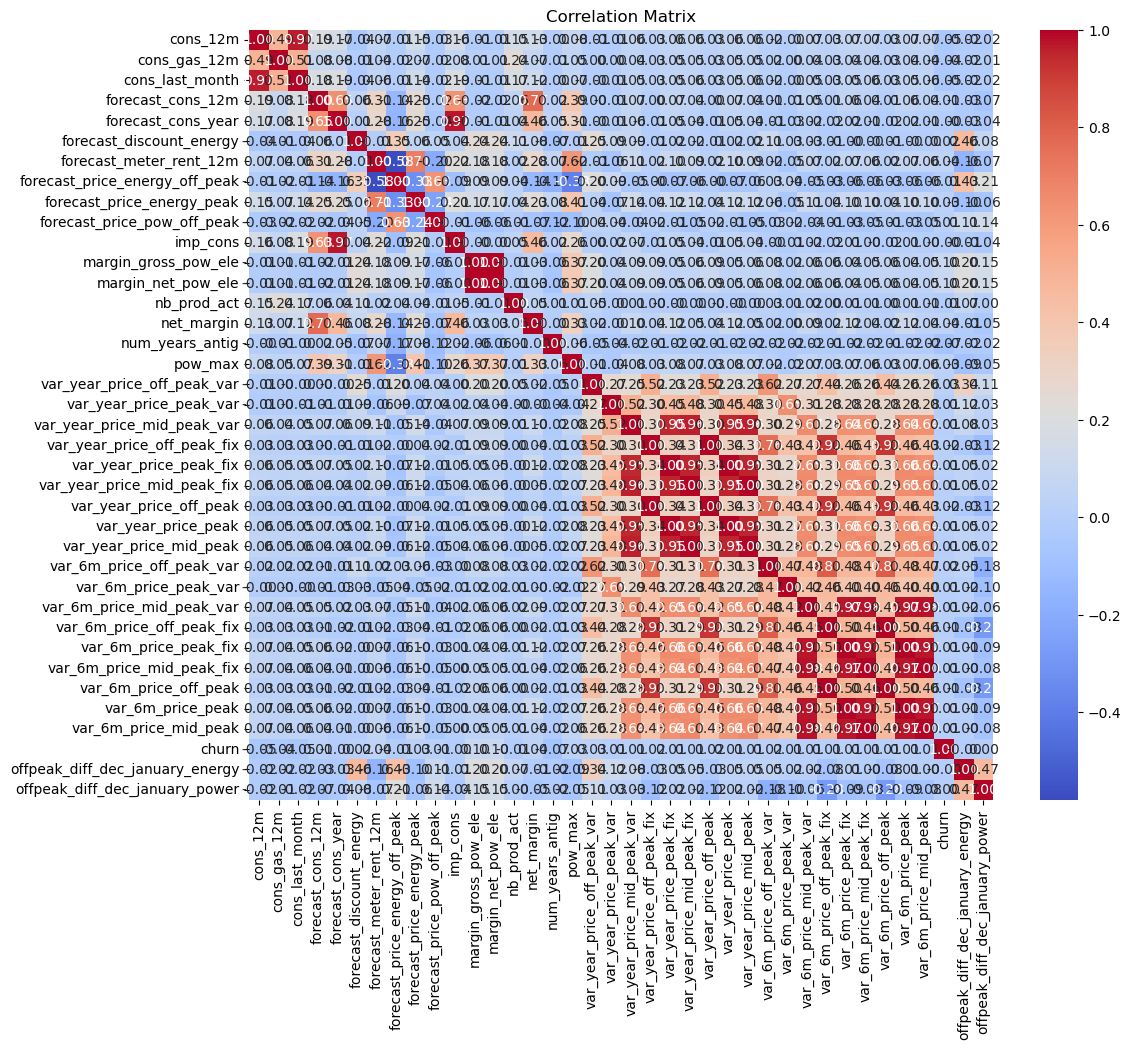

In [56]:
# Compute the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize correlations using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


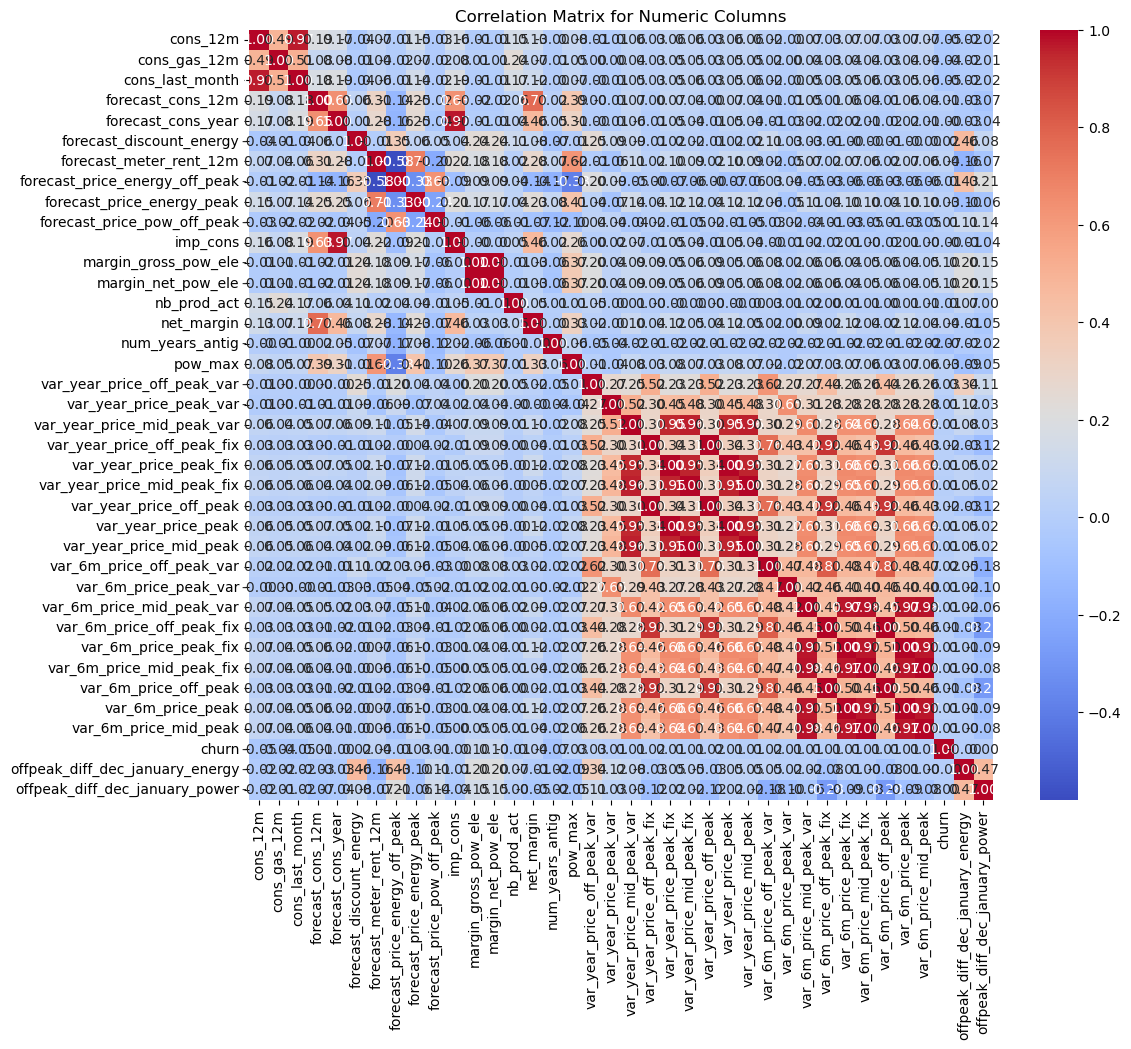

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()


In [58]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   cons_last_month                  14606 non-null  int64  
 3   forecast_cons_12m                14606 non-null  float64
 4   forecast_cons_year               14606 non-null  int64  
 5   forecast_discount_energy         14606 non-null  float64
 6   forecast_meter_rent_12m          14606 non-null  float64
 7   forecast_price_energy_off_peak   14606 non-null  float64
 8   forecast_price_energy_peak       14606 non-null  float64
 9   forecast_price_pow_off_peak      14606 non-null  float64
 10  imp_cons                         14606 non-null  float64
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

In [59]:
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Example using RandomForestClassifier for feature importance
X = numeric_df.drop(columns=['churn'])  # Replace 'target' with your actual target column
y = numeric_df['churn']

numeric_df = X.select_dtypes(include=['number'])

model = RandomForestClassifier()  # Or any other model of your choice
model.fit(numeric_df, y)

importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': numeric_df.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for Numerical Features:")
print(importance_df)



# Display feature importances
#for feature, importance in zip(X.columns, importances):
 #   print(f'Feature: {feature}, Importance: {importance}')

# Example using RFE for feature selection
#rfe = RFE(model, n_features_to_select=10)  # Adjust number of features as needed
#rfe.fit(X, y)

# Display selected features
#for feature, support in zip(X.columns, rfe.support_):
 #   print(f'Feature: {feature}, Selected: {support}')
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.feature_selection import RFE\n\n# Example using RandomForestClassifier for feature importance\nX = numeric_df.drop(columns=[\'churn\'])  # Replace \'target\' with your actual target column\ny = numeric_df[\'churn\']\n\nnumeric_df = X.select_dtypes(include=[\'number\'])\n\nmodel = RandomForestClassifier()  # Or any other model of your choice\nmodel.fit(numeric_df, y)\n\nimportances = model.feature_importances_\n\n# Create a DataFrame for feature importances\nimportance_df = pd.DataFrame({\n    \'Feature\': numeric_df.columns,\n    \'Importance\': importances\n}).sort_values(by=\'Importance\', ascending=False)\n\nprint("Feature Importance for Numerical Features:")\nprint(importance_df)\n\n\n\n# Display feature importances\n#for feature, importance in zip(X.columns, importances):\n #   print(f\'Feature: {feature}, Importance: {importance}\')\n\n# Example using RFE for feature selection\n#rfe = RFE(model, n_features_to_se

In [60]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   cons_last_month                  14606 non-null  int64  
 3   forecast_cons_12m                14606 non-null  float64
 4   forecast_cons_year               14606 non-null  int64  
 5   forecast_discount_energy         14606 non-null  float64
 6   forecast_meter_rent_12m          14606 non-null  float64
 7   forecast_price_energy_off_peak   14606 non-null  float64
 8   forecast_price_energy_peak       14606 non-null  float64
 9   forecast_price_pow_off_peak      14606 non-null  float64
 10  imp_cons                         14606 non-null  float64
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

In [61]:
# Select non-numeric columns, including datetime64 columns
non_numeric_df = df.select_dtypes(include=['object', 'datetime64[ns]'])

# Get an overview of non-numeric columns
print("Non-Numeric Columns Info:")
non_numeric_df.info()

# Optionally, view the first few rows of non-numeric data for more insight
print("\nSample Non-Numeric Data:")
print(non_numeric_df.head())

Non-Numeric Columns Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14606 non-null  object        
 1   channel_sales    14606 non-null  object        
 2   date_activ       14606 non-null  datetime64[ns]
 3   date_end         14606 non-null  datetime64[ns]
 4   date_modif_prod  14606 non-null  datetime64[ns]
 5   date_renewal     14606 non-null  datetime64[ns]
 6   has_gas          14606 non-null  object        
 7   origin_up        14606 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 913.0+ KB

Sample Non-Numeric Data:
                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd08

We will proceed with assessing the feature importance of the non-numeric data by preparing the dataset appropriately. This involves encoding categorical variables, engineering relevant features, and then applying suitable machine learning models to evaluate and rank the importance of these features in predicting customer churn.

In [63]:
# for has gas it is obviously a binary data, so we did binary encoding for it.

has_gas_encoded = non_numeric_df['has_gas'].map({'t':1, 'f':0})
has_gas_encoded.head()
non_numeric_df['has_gas_encoded'] = has_gas_encoded
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14606 non-null  object        
 1   channel_sales    14606 non-null  object        
 2   date_activ       14606 non-null  datetime64[ns]
 3   date_end         14606 non-null  datetime64[ns]
 4   date_modif_prod  14606 non-null  datetime64[ns]
 5   date_renewal     14606 non-null  datetime64[ns]
 6   has_gas          14606 non-null  object        
 7   origin_up        14606 non-null  object        
 8   has_gas_encoded  14606 non-null  int64         
dtypes: datetime64[ns](4), int64(1), object(4)
memory usage: 1.0+ MB


In [64]:
#We created new categories for the non_numeric categories and can identify then with the encoded suffix by their name.
#We check this category has_gas_encoded for non missing values.
has_gas_encoded.isna().sum()



0

In [65]:
#Let us create for sales_channel, we shall use label encoding for the preparation of this

channel_sales_data = non_numeric_df['channel_sales']

channel_sales_df = pd.DataFrame(channel_sales_data)

category_counts = channel_sales_df['channel_sales'].value_counts()

# Display sorted unique categories and their counts
print("Category Counts:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Category Counts:
foosdfpfkusacimwkcsosbicdxkicaua: 6754
MISSING: 3725
lmkebamcaaclubfxadlmueccxoimlema: 1843
usilxuppasemubllopkaafesmlibmsdf: 1375
ewpakwlliwisiwduibdlfmalxowmwpci: 893
sddiedcslfslkckwlfkdpoeeailfpeds: 11
epumfxlbckeskwekxbiuasklxalciiuu: 3
fixdbufsefwooaasfcxdxadsiekoceaa: 2


In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

channel_sales_df

# Initialize LabelEncoder
le = LabelEncoder()

channel_sales_df['channel_sales_encoded'] = le.fit_transform(channel_sales_df['channel_sales'])

# Display the DataFrame with the encoded 'channel_sales'
print("\nDataFrame with Encoded 'channel_sales':")
print(channel_sales_df)

# Display the mapping of labels to original categories
print("\nLabel Encoding Mapping:")
for category, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{category}: {label}")




DataFrame with Encoded 'channel_sales':
                          channel_sales  channel_sales_encoded
0      foosdfpfkusacimwkcsosbicdxkicaua                      4
1                               MISSING                      0
2      foosdfpfkusacimwkcsosbicdxkicaua                      4
3      lmkebamcaaclubfxadlmueccxoimlema                      5
4                               MISSING                      0
...                                 ...                    ...
14601  foosdfpfkusacimwkcsosbicdxkicaua                      4
14602  foosdfpfkusacimwkcsosbicdxkicaua                      4
14603  foosdfpfkusacimwkcsosbicdxkicaua                      4
14604  foosdfpfkusacimwkcsosbicdxkicaua                      4
14605                           MISSING                      0

[14606 rows x 2 columns]

Label Encoding Mapping:
MISSING: 0
epumfxlbckeskwekxbiuasklxalciiuu: 1
ewpakwlliwisiwduibdlfmalxowmwpci: 2
fixdbufsefwooaasfcxdxadsiekoceaa: 3
foosdfpfkusacimwkcsosbicdxkicaua:

In [67]:
print(channel_sales_df)

                          channel_sales  channel_sales_encoded
0      foosdfpfkusacimwkcsosbicdxkicaua                      4
1                               MISSING                      0
2      foosdfpfkusacimwkcsosbicdxkicaua                      4
3      lmkebamcaaclubfxadlmueccxoimlema                      5
4                               MISSING                      0
...                                 ...                    ...
14601  foosdfpfkusacimwkcsosbicdxkicaua                      4
14602  foosdfpfkusacimwkcsosbicdxkicaua                      4
14603  foosdfpfkusacimwkcsosbicdxkicaua                      4
14604  foosdfpfkusacimwkcsosbicdxkicaua                      4
14605                           MISSING                      0

[14606 rows x 2 columns]


In [68]:
c_s_encoded = channel_sales_df['channel_sales_encoded']
non_numeric_df['c_s_encoded'] = c_s_encoded
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14606 non-null  object        
 1   channel_sales    14606 non-null  object        
 2   date_activ       14606 non-null  datetime64[ns]
 3   date_end         14606 non-null  datetime64[ns]
 4   date_modif_prod  14606 non-null  datetime64[ns]
 5   date_renewal     14606 non-null  datetime64[ns]
 6   has_gas          14606 non-null  object        
 7   origin_up        14606 non-null  object        
 8   has_gas_encoded  14606 non-null  int64         
 9   c_s_encoded      14606 non-null  int32         
dtypes: datetime64[ns](4), int32(1), int64(1), object(4)
memory usage: 1.1+ MB


So we have succeeded to encoded the channel_sales and assign it to c_s_encoded, now let us encode category origin_up as well using label encoding


In [70]:
#first we iterate round the values of the category then categories and count.

origin_up_data = non_numeric_df['origin_up']

origin_up_df = pd.DataFrame(origin_up_data)

category_counts = origin_up_df['origin_up'].value_counts()

# Display sorted unique categories and their counts
print("Category Counts:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Category Counts:
lxidpiddsbxsbosboudacockeimpuepw: 7097
kamkkxfxxuwbdslkwifmmcsiusiuosws: 4294
ldkssxwpmemidmecebumciepifcamkci: 3148
MISSING: 64
usapbepcfoloekilkwsdiboslwaxobdp: 2
ewxeelcelemmiwuafmddpobolfuxioce: 1


In [71]:
# then we encode it

origin_up_df

# Initialize LabelEncoder
le = LabelEncoder()

origin_up_df['origin_up_encoded'] = le.fit_transform(origin_up_df['origin_up'])

# Display the DataFrame with the encoded 'channel_sales'
print("\nDataFrame with Encoded 'channel_sales':")
print(origin_up_df)

# Display the mapping of labels to original categories
print("\nLabel Encoding Mapping:")
for category, label in zip(le.classes_, le.transform(le.classes_)):
    print(f"{category}: {label}")


DataFrame with Encoded 'channel_sales':
                              origin_up  origin_up_encoded
0      lxidpiddsbxsbosboudacockeimpuepw                  4
1      kamkkxfxxuwbdslkwifmmcsiusiuosws                  2
2      kamkkxfxxuwbdslkwifmmcsiusiuosws                  2
3      kamkkxfxxuwbdslkwifmmcsiusiuosws                  2
4      kamkkxfxxuwbdslkwifmmcsiusiuosws                  2
...                                 ...                ...
14601  lxidpiddsbxsbosboudacockeimpuepw                  4
14602  lxidpiddsbxsbosboudacockeimpuepw                  4
14603  lxidpiddsbxsbosboudacockeimpuepw                  4
14604  lxidpiddsbxsbosboudacockeimpuepw                  4
14605  ldkssxwpmemidmecebumciepifcamkci                  3

[14606 rows x 2 columns]

Label Encoding Mapping:
MISSING: 0
ewxeelcelemmiwuafmddpobolfuxioce: 1
kamkkxfxxuwbdslkwifmmcsiusiuosws: 2
ldkssxwpmemidmecebumciepifcamkci: 3
lxidpiddsbxsbosboudacockeimpuepw: 4
usapbepcfoloekilkwsdiboslwaxobdp: 5


In [72]:
o_u_encoded = origin_up_df['origin_up_encoded']
o_u_encoded.head()
non_numeric_df['o_u_encoded'] = o_u_encoded
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               14606 non-null  object        
 1   channel_sales    14606 non-null  object        
 2   date_activ       14606 non-null  datetime64[ns]
 3   date_end         14606 non-null  datetime64[ns]
 4   date_modif_prod  14606 non-null  datetime64[ns]
 5   date_renewal     14606 non-null  datetime64[ns]
 6   has_gas          14606 non-null  object        
 7   origin_up        14606 non-null  object        
 8   has_gas_encoded  14606 non-null  int64         
 9   c_s_encoded      14606 non-null  int32         
 10  o_u_encoded      14606 non-null  int32         
dtypes: datetime64[ns](4), int32(2), int64(1), object(4)
memory usage: 1.1+ MB


In [73]:
#We shall use feature engineering to create a category from the dates non-numeric category
#We shall create a subscription duration feature and create a churn threshold.

time_non_numeric_df = non_numeric_df.select_dtypes(include=[ 'datetime64[ns]'])


time_non_numeric_df['subscription_duration'] = (time_non_numeric_df['date_end'] - time_non_numeric_df['date_activ']).dt.days

time_non_numeric_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_activ             14606 non-null  datetime64[ns]
 1   date_end               14606 non-null  datetime64[ns]
 2   date_modif_prod        14606 non-null  datetime64[ns]
 3   date_renewal           14606 non-null  datetime64[ns]
 4   subscription_duration  14606 non-null  int64         
dtypes: datetime64[ns](4), int64(1)
memory usage: 570.7 KB


In [74]:
subscription_duration = time_non_numeric_df['subscription_duration']
subscription_duration.head()
non_numeric_df['subscription_duration'] = subscription_duration
non_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     14606 non-null  object        
 1   channel_sales          14606 non-null  object        
 2   date_activ             14606 non-null  datetime64[ns]
 3   date_end               14606 non-null  datetime64[ns]
 4   date_modif_prod        14606 non-null  datetime64[ns]
 5   date_renewal           14606 non-null  datetime64[ns]
 6   has_gas                14606 non-null  object        
 7   origin_up              14606 non-null  object        
 8   has_gas_encoded        14606 non-null  int64         
 9   c_s_encoded            14606 non-null  int32         
 10  o_u_encoded            14606 non-null  int32         
 11  subscription_duration  14606 non-null  int64         
dtypes: datetime64[ns](4), int32(2), int64(2), object(4)
memory u

In [75]:
#checking for missing values

subscription_duration.isna().sum()

0

We are going to merge our encoded and engineered data and add it to our numeric data to find the feature importance and with it do a feature selection to determine which would be relevant for our predictive model.

In [77]:
non_numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     14606 non-null  object        
 1   channel_sales          14606 non-null  object        
 2   date_activ             14606 non-null  datetime64[ns]
 3   date_end               14606 non-null  datetime64[ns]
 4   date_modif_prod        14606 non-null  datetime64[ns]
 5   date_renewal           14606 non-null  datetime64[ns]
 6   has_gas                14606 non-null  object        
 7   origin_up              14606 non-null  object        
 8   has_gas_encoded        14606 non-null  int64         
 9   c_s_encoded            14606 non-null  int32         
 10  o_u_encoded            14606 non-null  int32         
 11  subscription_duration  14606 non-null  int64         
dtypes: datetime64[ns](4), int32(2), int64(2), object(4)
memory u

In [78]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   cons_last_month                  14606 non-null  int64  
 3   forecast_cons_12m                14606 non-null  float64
 4   forecast_cons_year               14606 non-null  int64  
 5   forecast_discount_energy         14606 non-null  float64
 6   forecast_meter_rent_12m          14606 non-null  float64
 7   forecast_price_energy_off_peak   14606 non-null  float64
 8   forecast_price_energy_peak       14606 non-null  float64
 9   forecast_price_pow_off_peak      14606 non-null  float64
 10  imp_cons                         14606 non-null  float64
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

In [110]:
extracted_columns = non_numeric_df[['has_gas_encoded','c_s_encoded', 'o_u_encoded','subscription_duration' ]]

extracted_columns.reset_index(drop=True, inplace=True)
numeric_df.reset_index(drop=True, inplace=True)

# Concatenate the numeric DataFrame with the extracted columns
merged_df = pd.concat([numeric_df, extracted_columns], axis=1)

# Display the merged DataFrame
print(merged_df.head())

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                     

In [112]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   cons_last_month                  14606 non-null  int64  
 3   forecast_cons_12m                14606 non-null  float64
 4   forecast_cons_year               14606 non-null  int64  
 5   forecast_discount_energy         14606 non-null  float64
 6   forecast_meter_rent_12m          14606 non-null  float64
 7   forecast_price_energy_off_peak   14606 non-null  float64
 8   forecast_price_energy_peak       14606 non-null  float64
 9   forecast_price_pow_off_peak      14606 non-null  float64
 10  imp_cons                         14606 non-null  float64
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

In [114]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cons_12m                         14606 non-null  int64  
 1   cons_gas_12m                     14606 non-null  int64  
 2   cons_last_month                  14606 non-null  int64  
 3   forecast_cons_12m                14606 non-null  float64
 4   forecast_cons_year               14606 non-null  int64  
 5   forecast_discount_energy         14606 non-null  float64
 6   forecast_meter_rent_12m          14606 non-null  float64
 7   forecast_price_energy_off_peak   14606 non-null  float64
 8   forecast_price_energy_peak       14606 non-null  float64
 9   forecast_price_pow_off_peak      14606 non-null  float64
 10  imp_cons                         14606 non-null  float64
 11  margin_gross_pow_ele             14606 non-null  float64
 12  margin_net_pow_ele

Let us get the feature importance of the merged dataframe and also do feature selection

In [116]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

# Assuming 'merged_df' is your DataFrame and 'churn' is your target variable
X = merged_df.drop(columns=['churn'])  # Drop the target variable to get features
y = merged_df['churn']

# Initialize and fit the RandomForestClassifier
model = RandomForestClassifier()  # You can adjust parameters as needed
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance for All Features:")
print(importance_df)

# Example using RFE for feature selection
# Initialize RFE with the model and number of features to select
rfe = RFE(model, n_features_to_select=10)  # Adjust number of features as needed
rfe.fit(X, y)

# Create a DataFrame for RFE results
rfe_df = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("\nRFE Selected Features:")
print(rfe_df)


Feature Importance for All Features:
                            Feature  Importance
0                          cons_12m    0.064798
6           forecast_meter_rent_12m    0.062064
14                       net_margin    0.059444
3                 forecast_cons_12m    0.057558
12               margin_net_pow_ele    0.054593
11             margin_gross_pow_ele    0.053228
16                          pow_max    0.043048
2                   cons_last_month    0.042761
23          var_year_price_off_peak    0.039640
35  offpeak_diff_dec_january_energy    0.038052
17      var_year_price_off_peak_var    0.037225
40            subscription_duration    0.036734
7    forecast_price_energy_off_peak    0.035883
10                         imp_cons    0.034871
4                forecast_cons_year    0.034101
32            var_6m_price_off_peak    0.025887
26        var_6m_price_off_peak_var    0.023953
24              var_year_price_peak    0.020085
18          var_year_price_peak_var    0.019261
20 